<a href="https://colab.research.google.com/github/Ivan8Garcia/challenge-data-science/blob/main/TelecomX_Parte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARTE 2: Prediccion de Cancelación (Churn)**

##**Misión**

Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.

La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.

## **Objetivos del Desafío**

Preparar los datos para el modelado (tratamiento, codificación, normalización).

Realizar análisis de correlación y selección de variables.

Entrenar dos o más modelos de clasificación.

Evaluar el rendimiento de los modelos con métricas.

Interpretar los resultados, incluyendo la importancia de las variables.

Crear una conclusión estratégica señalando los principales factores que

Carga el archivo CSV que contiene los datos tratados anteriormente.
📂 Atención: Utiliza el mismo archivo que limpiaste y organizaste en la Parte 1 del desafío Telecom X. Debe contener solo las columnas relevantes, ya con los datos corregidos y estandarizados.

In [174]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

datos=pd.read_csv("/content/datos_TelecomX_tratados.csv")
datos.shape

(7043, 22)

In [175]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   objec

In [176]:
datos.head(3)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,Yes,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,Yes,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,Yes,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333


In [177]:
datos.describe()

,Churn,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.PaperlessBilling,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,118.750000,8684.800000,3.958333


In [178]:
datos.describe(include="O")

,customerID,customer.gender,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaymentMethod
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,3,3,3,3,3,3,3,3,3,4
top,9995-HOTOH,Male,Yes,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Electronic check
freq,1,3555,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,2365


#**Eliminación de Columnas Irrelevantes**

Elimina columnas que no aportan valor al análisis o a los modelos predictivos, como identificadores únicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicción de la cancelación y pueden incluso perjudicar el desempeño de los modelos.

In [179]:
datos=datos.drop("customerID",axis=1)
datos.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,internet.OnlineSecurity,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0,Female,0,1,1,9,Yes,0,DSL,0,...,0,1,1,0,One year,1,Mailed check,65.6,593.30,2.186667
1,0,Male,0,0,0,9,Yes,1,DSL,0,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,1,Male,0,0,0,4,Yes,0,Fiber optic,0,...,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,1,Male,1,1,0,13,Yes,0,Fiber optic,0,...,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,1,Female,1,1,0,3,Yes,0,Fiber optic,0,...,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [180]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      7043 non-null   int64  
 1   customer.gender            7043 non-null   object 
 2   customer.SeniorCitizen     7043 non-null   int64  
 3   customer.Partner           7043 non-null   int64  
 4   customer.Dependents        7043 non-null   int64  
 5   customer.tenure            7043 non-null   int64  
 6   phone.PhoneService         7043 non-null   object 
 7   phone.MultipleLines        7043 non-null   object 
 8   internet.InternetService   7043 non-null   object 
 9   internet.OnlineSecurity    7043 non-null   object 
 10  internet.OnlineBackup      7043 non-null   object 
 11  internet.DeviceProtection  7043 non-null   object 
 12  internet.TechSupport       7043 non-null   object 
 13  internet.StreamingTV       7043 non-null   objec

#**Verificación de la Proporción de Cancelación (Churn)**

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

Puedes usar **value_counts()** de pandas para obtener esta proporción:

In [181]:
import plotly.express as px

In [182]:
px.histogram(datos, x= 'Churn', text_auto = True)

In [183]:
# 0= NO CHURN  ; 1= CHURN
px.histogram(datos, x = 'customer.gender', text_auto = True, color = 'Churn', barmode = 'group')

Para hacer la separación de los datos entre variables explicativas y variable objetivo, necesitamos detectar cuáles columnas formarán parte de cada uno de estos conjuntos de datos. La variable objetivo es la columna churn. Las variables explicativas son las demás columnas, que explicarán el comportamiento de la variable objetivo.

In [184]:
X = datos.drop('Churn', axis = 1)
y = datos['Churn']


#**Encoding**

Transforma las variables categóricas a formato numérico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un método de codificación adecuado, como one-hot encoding.

In [185]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


categoricas = ['customer.gender','phone.PhoneService','account.Contract','account.PaymentMethod', 'phone.MultipleLines','internet.InternetService',
               'internet.OnlineSecurity','internet.OnlineBackup','internet.DeviceProtection','internet.TechSupport','internet.StreamingTV',
               'internet.StreamingMovies']

In [186]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'),
    categoricas),
    remainder='passthrough',
    sparse_threshold=0,
    force_int_remainder_cols=False)



In [187]:
columnas = X.columns
X = one_hot_enc.fit_transform(X)
X = pd.DataFrame(X, columns=one_hot_enc.get_feature_names_out(columnas))

Después de transformar las variables explicativas, queda transformar la variable objetivo. Vamos a utilizar el LabelEncoder, que es el método recomendado para esta tarea.

In [188]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

1 - Vamos a separar el conjunto de datos entre entrenamiento y prueba, para ello necesitamos utilizar el método train_test_split de la biblioteca Scikit-Learn. Primero, vamos a importar la función con el código:

In [189]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,  random_state = 5)

2 - Con los datos separados entre entrenamiento y prueba, podemos generar el modelo base con el DummyClassifier a partir de los datos de entrenamiento. Primero, vamos a importar la función:

In [190]:
from sklearn.dummy import DummyClassifier

In [191]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)


0.7348097671777399

3 - Para construir un modelo de árbol de decisión, necesitamos los mismos pasos que el modelo base. Debemos importar la función, inicializar el modelo, hacer el ajuste del modelo en los datos de entrenamiento y, por último, evaluar el desempeño en los datos de prueba. Vamos entonces a cada una de estas tareas, utilizando el **max_depth=5** al momento de inicializar el modelo

In [192]:
from sklearn.tree import DecisionTreeClassifier

In [193]:
arbol = DecisionTreeClassifier(max_depth = 5, random_state =5)
arbol.fit(X_train,y_train)

arbol.score(X_test,y_test)

0.7995457126632595

In [194]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

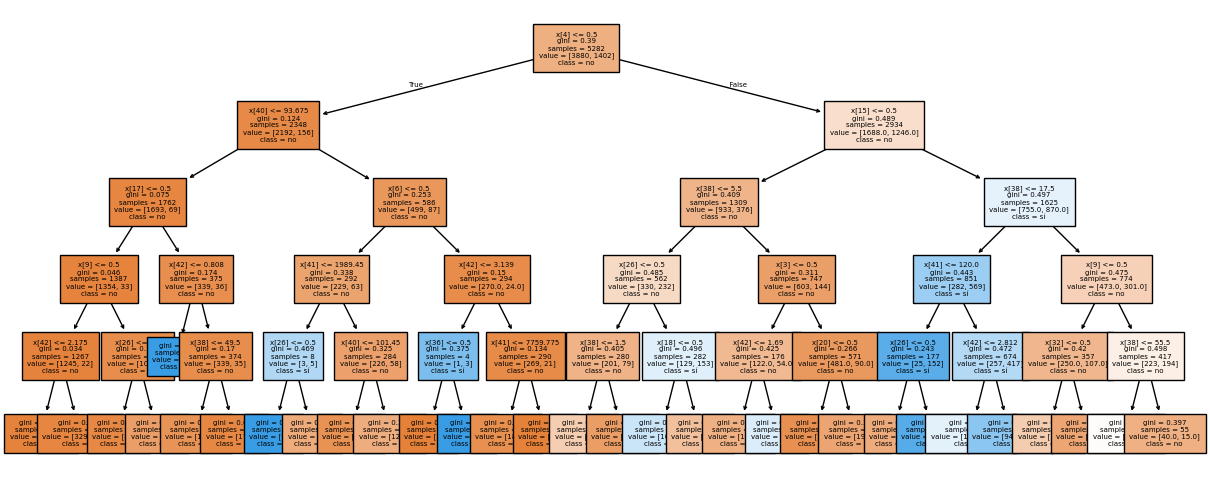

In [195]:
plt.figure(figsize = (15, 6))
plot_tree(arbol, filled = True, class_names = ['no', 'sí'], fontsize = 5);

In [196]:
#Esto te mostrará cuántos valores faltantes hay en cada columna.
X_train.isnull().sum()

,0
onehotencoder__customer.gender_Female,0
onehotencoder__customer.gender_Male,0
onehotencoder__phone.PhoneService_No,0
onehotencoder__phone.PhoneService_Yes,0
onehotencoder__account.Contract_Month-to-month,0
onehotencoder__account.Contract_One year,0
onehotencoder__account.Contract_Two year,0
onehotencoder__account.PaymentMethod_Bank transfer (automatic),0
onehotencoder__account.PaymentMethod_Credit card (automatic),0
onehotencoder__account.PaymentMethod_Electronic check,0


In [197]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputado = imputer.fit_transform(X_train)
# X_train_normalizado = normalizacion.fit_transform(X_train_imputado) # Redundant

# **Normalización o Estandarización (si es necesario)**

Evalúa la necesidad de normalizar o estandarizar los datos, según los modelos que se aplicarán. Modelos basados en distancia, como KNN, SVM, Regresión Logística y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en árboles, como **Decision Tree, Random Forest y XGBoost,** no son sensibles a la escala de los datos.

In [166]:
from sklearn.preprocessing import MinMaxScaler

1 - Para hacer la normalización de los datos, vamos a utilizar el método MinMaxScaler. Primero, importamos la función y luego hacemos la transformación de los datos de entrenamiento de las variables explicativas, almacenando en una nueva variable **X_train_normalizado:**

In [168]:
normalizacion = MinMaxScaler()
# X_train_normalizado = normalizacion.fit_transform(X_train_imputado) # Redundant

si quisieramos visualizar el resultado de la transformación, podemos utilizar el método pd.DataFrame para generar una tabla con los datos:

In [169]:
pd.DataFrame(X_train_normalizado)

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.847222,1.0,0.429851,0.430689,0.429851
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.958333,1.0,0.429851,0.474544,0.429851
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,0.652778,1.0,0.663682,0.461487,0.663682
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.986111,1.0,0.902985,0.881952,0.902985
4,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.254229,0.060253,0.254229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.375000,0.0,0.319403,0.160691,0.319403
5278,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.486111,1.0,0.944776,0.449486,0.944776
5279,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.361111,1.0,0.331343,0.147311,0.331343
5280,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.041667,0.0,0.270647,0.014182,0.270647


In [170]:
#Esto devolverá todas las filas que contienen al menos un valor faltante.
np.isnan(X_train_normalizado).sum()

np.int64(0)

In [171]:
#Si ya normalizaste los datos y quieres verificar:

#Esto te dice cuántos valores NaN hay en el array después de la normalización.

#Si X_train_normalizado todavía es un DataFrame:
pd.DataFrame(X_train_normalizado).isnull().sum()

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


2 - Con los datos normalizados, podemos generar el modelo de vecinos más cercanos con el KNeighborsClassifier a partir de los datos de entrenamiento normalizados. Primero, importamos la función

In [172]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
knn = KNeighborsClassifier()
knn.fit(X_train_normalizado, y_train)

KNeighborsClassifier()

In [202]:
X_test_imputado = imputer.transform(X_test)
# X_test_normalizado = normalizacion.transform(X_test_imputado) # Redundant

In [203]:
knn.score(X_test_normalizado, y_test)

0.7688813174332766

In [206]:
print(f'Exactitud Dummy: {dummy.score(X_test, y_test)}')
print(f'Exactitud Árbol: {arbol.score(X_test, y_test)}')
print(f'Exactitud KNN: {knn.score(X_test_normalizado, y_test)}')

Exactitud Dummy: 0.7348097671777399
Exactitud Árbol: 0.7995457126632595
Exactitud KNN: 0.7688813174332766


#**Análisis de Correlación**

Visualiza la matriz de correlación para identificar relaciones entre las variables numéricas. Presta especial atención a las variables que muestran una mayor **correlación con la cancelación(churn)**, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

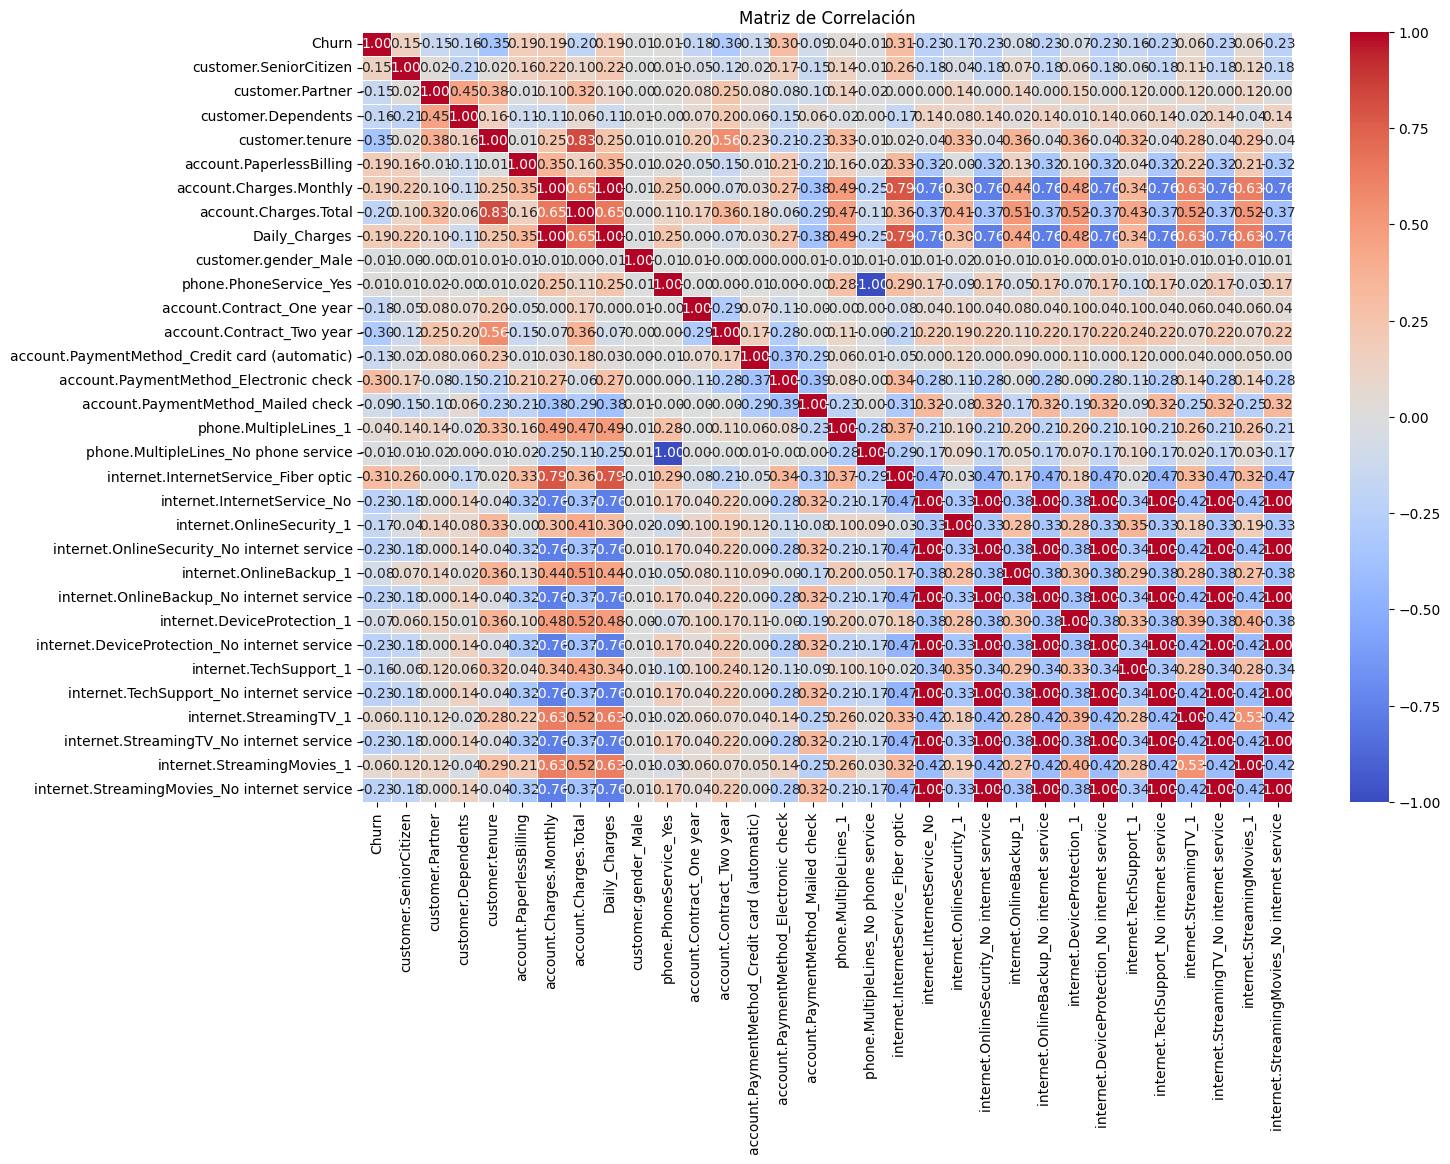


Correlación con Churn:
Churn                                            1.000000
internet.InternetService_Fiber optic             0.308020
account.PaymentMethod_Electronic check           0.301919
account.Charges.Monthly                          0.193356
Daily_Charges                                    0.193356
account.PaperlessBilling                         0.191825
customer.SeniorCitizen                           0.150889
internet.StreamingTV_1                           0.063228
internet.StreamingMovies_1                       0.061382
phone.MultipleLines_1                            0.040102
phone.PhoneService_Yes                           0.011942
customer.gender_Male                            -0.008612
phone.MultipleLines_No phone service            -0.011942
internet.DeviceProtection_1                     -0.066160
internet.OnlineBackup_1                         -0.082255
account.PaymentMethod_Mailed check              -0.091683
account.PaymentMethod_Credit card (automatic)   

In [224]:
import seaborn as sns
import matplotlib.pyplot as plt

# Apply one-hot encoding to the categorical columns in the 'datos' DataFrame
datos_encoded = pd.get_dummies(datos, columns=categoricas, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = datos_encoded.corr()

# Visualiza la matriz de correlación
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

# Opcionalmente, puedes mostrar solo las correlaciones con 'Churn'
print("\nCorrelación con Churn:")
print(correlation_matrix['Churn'].sort_values(ascending=False))

#**Balanceo de Clases (opcional)**

Si deseas profundizar en el análisis, aplica técnicas de balanceo como undersampling o oversampling. En situaciones de fuerte desbalanceo, herramientas como **SMOTE** pueden ser útiles para generar ejemplos sintéticos de la clase minoritaria.

In [219]:
#from imblearn.over_sampling import SMOTE

In [218]:
#over_sampling= SMOTE()
#X_balanceada,y_balanceada=over_sampling.fit_resample(X_train_normalizado,y_train)

In [215]:
#en esta celda ya nos damos cuenta que hemos balanceado
#y_balanceada.value_counts(normalize=True)

In [ ]:
# Apply the imputer and normalizer to the test data
X_test_imputado = imputer.transform(X_test)
# X_test_normalizado = normalizacion.transform(X_test_imputado) # Redundant

# Evaluate the KNeighborsClassifier model on the normalized test data
# knn.score(X_test_normalizado, y_test) # Redundant